In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv('/content/tips (data for regression problem).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [5]:
X = df.drop(columns=['tip'],axis=1)
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ***Applying Regression Models***

In [6]:
models = {
    'Linear': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1, 10, 100]}
    },
    'Lasso': {
        'model': Lasso(),
        'params': {'alpha': [0.001, 0.01, 0.1, 1, 10]}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [50, 100], 'max_depth': [10, 20], 'max_features': ['sqrt', 'log2']},
    },
    'SVR': {
        'model': SVR(),
        'params': {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5], 'kernel': ['linear', 'rbf']}
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]}
    }
}

best_models = {}
important_features={}
evaluation = {}
y_pred = {}

## ***Linear Regression :***

In [7]:
linear_reg = LinearRegression()
best_models['Linear'] = linear_reg.fit(X_train, y_train)

# Predictions
y_pred['Linear'] = best_models['Linear'].predict(X_test)

In [8]:
# Feature importance based on Linear Regression model
important_features_linear = pd.Series(best_models['Linear'].coef_, index=X.columns).sort_values(ascending=False)
important_features['Linear'] = important_features_linear


# ***Ridge Regression***

In [9]:
ridge_grid_search = GridSearchCV(models['Ridge']['model'], models['Ridge']['params'], cv=5, scoring='r2')
ridge_grid_search.fit(X_train, y_train)
best_models['Ridge'] = ridge_grid_search.best_estimator_

y_pred['Ridge'] = best_models['Ridge'].predict(X_test)

In [10]:
# Feature importance based on Ridge Regression model
important_features_ridge = pd.Series(best_models['Ridge'].coef_, index=X.columns).sort_values(ascending=False)
important_features['Ridge'] = important_features_ridge

# ***Lasso Regression :***

In [11]:
lasso_grid_search = GridSearchCV(models['Lasso']['model'], models['Lasso']['params'], cv=5, scoring='r2')
lasso_grid_search.fit(X_train, y_train)
best_models['Lasso'] = lasso_grid_search.best_estimator_

y_pred['Lasso'] = best_models['Lasso'].predict(X_test)

In [12]:
# Feature importance based on Lasso Regression model
important_features_lasso = pd.Series(best_models['Lasso'].coef_, index=X.columns).sort_values(ascending=False)
important_features['Lasso'] = important_features_lasso

## ***Decision Tree Regression :***

In [13]:
decision_tree_grid_search = GridSearchCV(models['Decision Tree']['model'], models['Decision Tree']['params'], cv=5, scoring='r2')
decision_tree_grid_search.fit(X_train, y_train)
best_models['Decision Tree'] = decision_tree_grid_search.best_estimator_

y_pred['Decision Tree'] = best_models['Decision Tree'].predict(X_test)

In [14]:
# Feature importance based on Decision Tree Regression model
important_features_decision_tree = pd.Series(best_models['Decision Tree'].feature_importances_, index=X.columns).sort_values(ascending=False)
important_features['Decision Tree'] = important_features_decision_tree

## ***Ensemble Method (Random Forest Regression)***

In [15]:
random_forest_grid_search = GridSearchCV(models['Random Forest']['model'], models['Random Forest']['params'], cv=5, scoring='r2')
random_forest_grid_search.fit(X_train, y_train)
best_models['Random Forest'] = random_forest_grid_search.best_estimator_

y_pred['Random Forest'] = best_models['Random Forest'].predict(X_test)

In [16]:
# Feature importance based on Random Forest Regression model
important_features_random_forest = pd.Series(best_models['Random Forest'].feature_importances_, index=X.columns).sort_values(ascending=False)
important_features['Random Forest'] = important_features_random_forest

## ***Support Vector Regression (SVR) :***

In [17]:
SVR_grid_search = GridSearchCV(models['SVR']['model'], models['SVR']['params'], cv=5, scoring='r2')
SVR_grid_search.fit(X_train, y_train)
best_models['SVR'] = SVR_grid_search.best_estimator_

y_pred['SVR'] = best_models['SVR'].predict(X_test)

In [18]:
# Feature importance based on Support Vector Regression model
results = permutation_importance(best_models['SVR'], X_test, y_test, n_repeats=30, random_state=42, scoring='r2')
important_features_SVR = pd.Series(results.importances_mean, index=X.columns).sort_values(ascending=False)
important_features['SVR'] = important_features_SVR

## ***K-Nearest Neighbors (KNN) Regression :***

In [19]:
knn_grid_search = GridSearchCV(models['KNN']['model'], models['KNN']['params'], cv=5, scoring='r2')
knn_grid_search.fit(X_train, y_train)
best_models['KNN'] = knn_grid_search.best_estimator_

y_pred['KNN'] = best_models['KNN'].predict(X_test)

In [20]:
# Feature importance based on K-Nearest Neighbors (KNN) Regression model
from sklearn.inspection import permutation_importance

result = permutation_importance(best_models['KNN'], X, y, n_repeats=10, random_state=42)
important_features_KNN = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)
important_features['KNN'] = important_features_KNN

## ***Evalaution of models trained above :***

In [21]:
for model in y_pred:
  evaluation[model] = {
      'R2': r2_score(y_test, y_pred[model]),
      'MSE': mean_squared_error(y_test, y_pred[model]),
      'MAE': mean_absolute_error(y_test, y_pred[model]),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred[model]))
  }

In [22]:
for model in evaluation:
  print(f"Model: {model}")
  print(f"R2 Score: {evaluation[model]['R2']}")
  print(f"MSE: {evaluation[model]['MSE']}")
  print(f"MAE: {evaluation[model]['MAE']}")
  print(f"RMSE: {evaluation[model]['RMSE']}")
  print()

Model: Linear
R2 Score: 0.43730181943482493
MSE: 0.7033566017436106
MAE: 0.6671331480264893
RMSE: 0.8386635807900631

Model: Ridge
R2 Score: 0.5011646321479138
MSE: 0.6235299158237257
MAE: 0.6440017193463389
RMSE: 0.7896391047964416

Model: Lasso
R2 Score: 0.5467115210170849
MSE: 0.5665976098709371
MAE: 0.6256100264339348
RMSE: 0.7527267830168773

Model: Decision Tree
R2 Score: 0.05126116784204582
MSE: 1.185896354345026
MAE: 0.8140762876579204
RMSE: 1.088988684213489

Model: Random Forest
R2 Score: 0.31421431712707826
MSE: 0.857212452589494
MAE: 0.6946234929469625
RMSE: 0.9258576848465935

Model: SVR
R2 Score: 0.45895939296866406
MSE: 0.676285255418173
MAE: 0.6612391964559752
RMSE: 0.8223656458158822

Model: KNN
R2 Score: 0.4222306051767176
MSE: 0.7221951877047115
MAE: 0.6620181405895692
RMSE: 0.8498206797346788



### **From above values of R2 score and error values, we can say that : Lasso (high R2 score), Ridge (high R2 score) and SVR (low error) are best models. Whereas Linear and KNN are moderate models. At last, Decision trees (low R2 score and highest error) and Random Forest (low R2 score) are weak models.**

## ***Importance of features based on models trained above:***

In [23]:
for model in important_features:
  print(f"Model: {model}")
  print(f"Important Features: \n {important_features[model]}")
  print()

Model: Linear
Important Features: 
 size          0.233484
time_Lunch    0.094957
total_bill    0.094700
sex_Male      0.028819
day_Sun      -0.050793
day_Thur     -0.179721
day_Sat      -0.185785
smoker_Yes   -0.192353
dtype: float64

Model: Ridge
Important Features: 
 size          0.137429
total_bill    0.098532
day_Sun       0.032653
time_Lunch    0.010755
sex_Male      0.007421
day_Thur      0.003391
day_Sat      -0.044285
smoker_Yes   -0.065906
dtype: float64

Model: Lasso
Important Features: 
 total_bill    0.093896
size          0.000000
sex_Male      0.000000
smoker_Yes   -0.000000
day_Sat      -0.000000
day_Sun       0.000000
day_Thur     -0.000000
time_Lunch   -0.000000
dtype: float64

Model: Decision Tree
Important Features: 
 total_bill    0.847089
smoker_Yes    0.053683
size          0.053341
day_Sun       0.026843
time_Lunch    0.008918
day_Thur      0.004382
day_Sat       0.002980
sex_Male      0.002762
dtype: float64

Model: Random Forest
Important Features: 
 total_bi

### **Using above code snippet, the importance of features is shown above in descending order of their importance based on different models trained. Higher the importance, higher the coefficient.**

In [24]:
for model in important_features:
  print(f"Model: {model}")
  print(f"Important Features: \n {important_features[model].index.tolist()}")
  print()

Model: Linear
Important Features: 
 ['size', 'time_Lunch', 'total_bill', 'sex_Male', 'day_Sun', 'day_Thur', 'day_Sat', 'smoker_Yes']

Model: Ridge
Important Features: 
 ['size', 'total_bill', 'day_Sun', 'time_Lunch', 'sex_Male', 'day_Thur', 'day_Sat', 'smoker_Yes']

Model: Lasso
Important Features: 
 ['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']

Model: Decision Tree
Important Features: 
 ['total_bill', 'smoker_Yes', 'size', 'day_Sun', 'time_Lunch', 'day_Thur', 'day_Sat', 'sex_Male']

Model: Random Forest
Important Features: 
 ['total_bill', 'size', 'smoker_Yes', 'sex_Male', 'day_Sat', 'day_Sun', 'time_Lunch', 'day_Thur']

Model: SVR
Important Features: 
 ['total_bill', 'sex_Male', 'time_Lunch', 'day_Thur', 'day_Sun', 'day_Sat', 'smoker_Yes', 'size']

Model: KNN
Important Features: 
 ['total_bill', 'smoker_Yes', 'size', 'day_Sun', 'day_Thur', 'sex_Male', 'day_Sat', 'time_Lunch']



### ***From above code, as almost all models have largest coefficients/weightage for 'total_bill' and 'size' features, we can say that 'total_bill' and 'size' feature significantly impact tip amounts. The importance of features is shown above in descending order of their importance (that effects tip amounts) based on different models.***

### **So, we can conclude that 'total_bill' and 'size' are the most significant features that impacts tip amounts.**

### **Insights for management :**

Based on above conclusions, we acknowleged the importance of features like 'total_bill' and 'size' (number of diners) impacting tip amounts, here are some actionable insights for management to improve customer service strategies and optimize revenue management:

### **1. Suggest More Menu Items**

Since bigger bills lead to better tips, encourage servers to suggest extra items like appetizers, desserts, or special drinks. This makes the meal more enjoyable and can lead to higher spending and tips.

### **2. Assign Experienced Servers to Larger Groups**

Bigger groups usually mean bigger bills and tips, so assign them to experienced servers who can handle larger tables well. This makes service smoother and can increase customer satisfaction.
Consider offering bundled menu options or group discounts to encourage larger groups.
### **3. Offer Group Deals**

Since larger groups contribute positively to tipping, consider promoting discounts or loyalty points for groups dining together. Group discounts for certain days (like weekdays) can attract more diners during slower times, optimizing restaurant capacity and increasing average table size.
### **4. Introduce Digital Payment Options with Suggested Tip Percentages**

Make tipping easier by adding tip suggestions on digital payment screens (like 15%, 18%, or 20%). This makes tipping convenient, transparent and can encourage customers to tip more.


# **Part - 2: Check if the data follows a linear trend using...**

## ***Scatter Plot :***

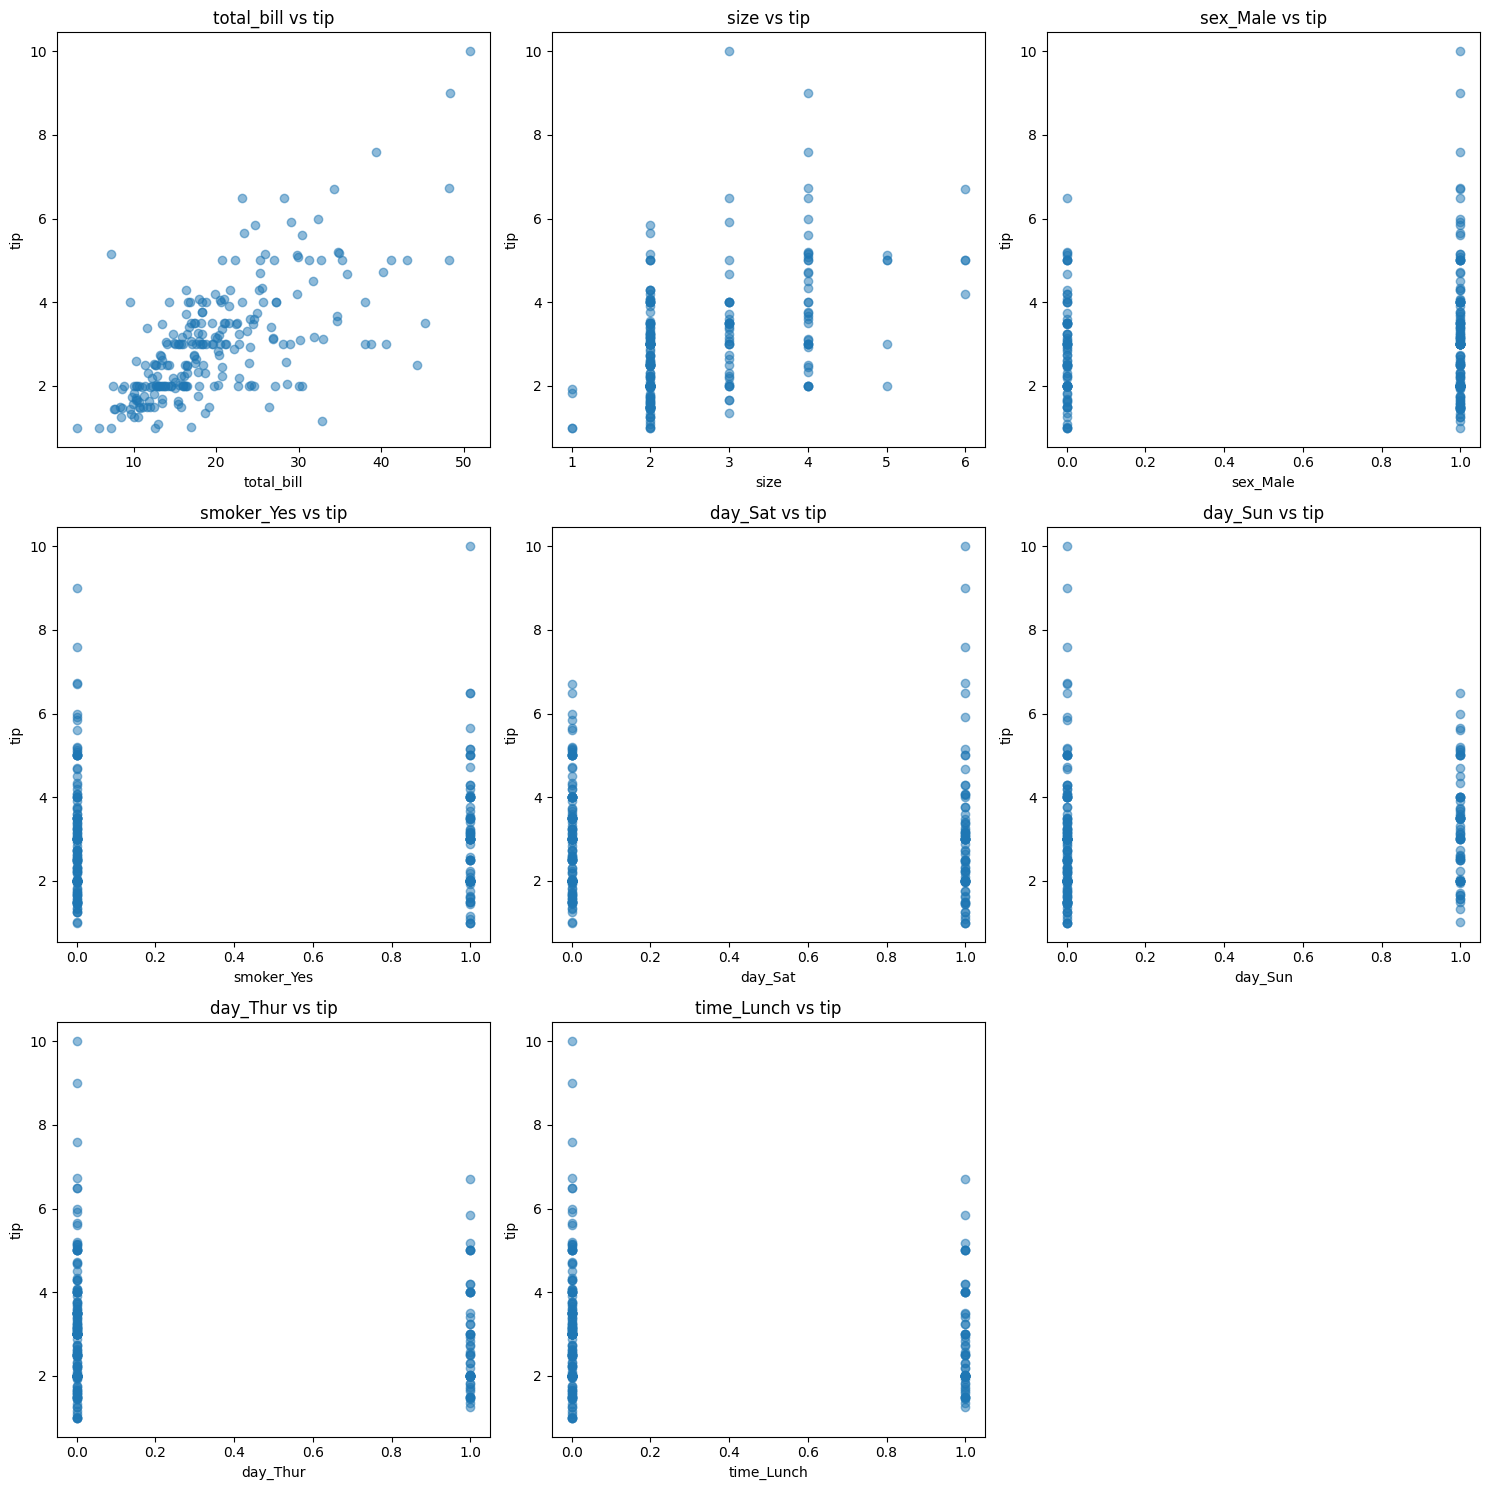

In [25]:
num_predictors = len(X.columns)

n_cols = 3
n_rows = math.ceil(num_predictors / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, predictor in enumerate(X.columns):
    axes[i].scatter(X[predictor], y, alpha=0.5)
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('tip')
    axes[i].set_title(f'{predictor} vs tip')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **From above scatter-plots, we have following conclusions for linearity :**
### **1. 'total_bill' vs 'tip'**

If total bill is on lower-side (small bill amount), the relation between 'total_bill' and 'tip' can be seen to be linear. As amount of total-bill increases, non-linear nature between the two increases.

### **2. 'size' vs 'tip'**

'size' denotes the number of customers dining in group. For 'size' greater than 4, number of such data-points is less (can be seen from plot), so, ignoring data-points where 'size' value is greater than 4 (as no concrete prediction because their frequency is less). Other than that, for 'size' values less than or equal to 4, as 'size' increases from 1 to 4, tip-amount also increases, hence, can be thought as linear.

### **For other features, nothing much can be infered from the above plots and also, the importance of these features is less as discussed previously.**

## ***Pair Plot***

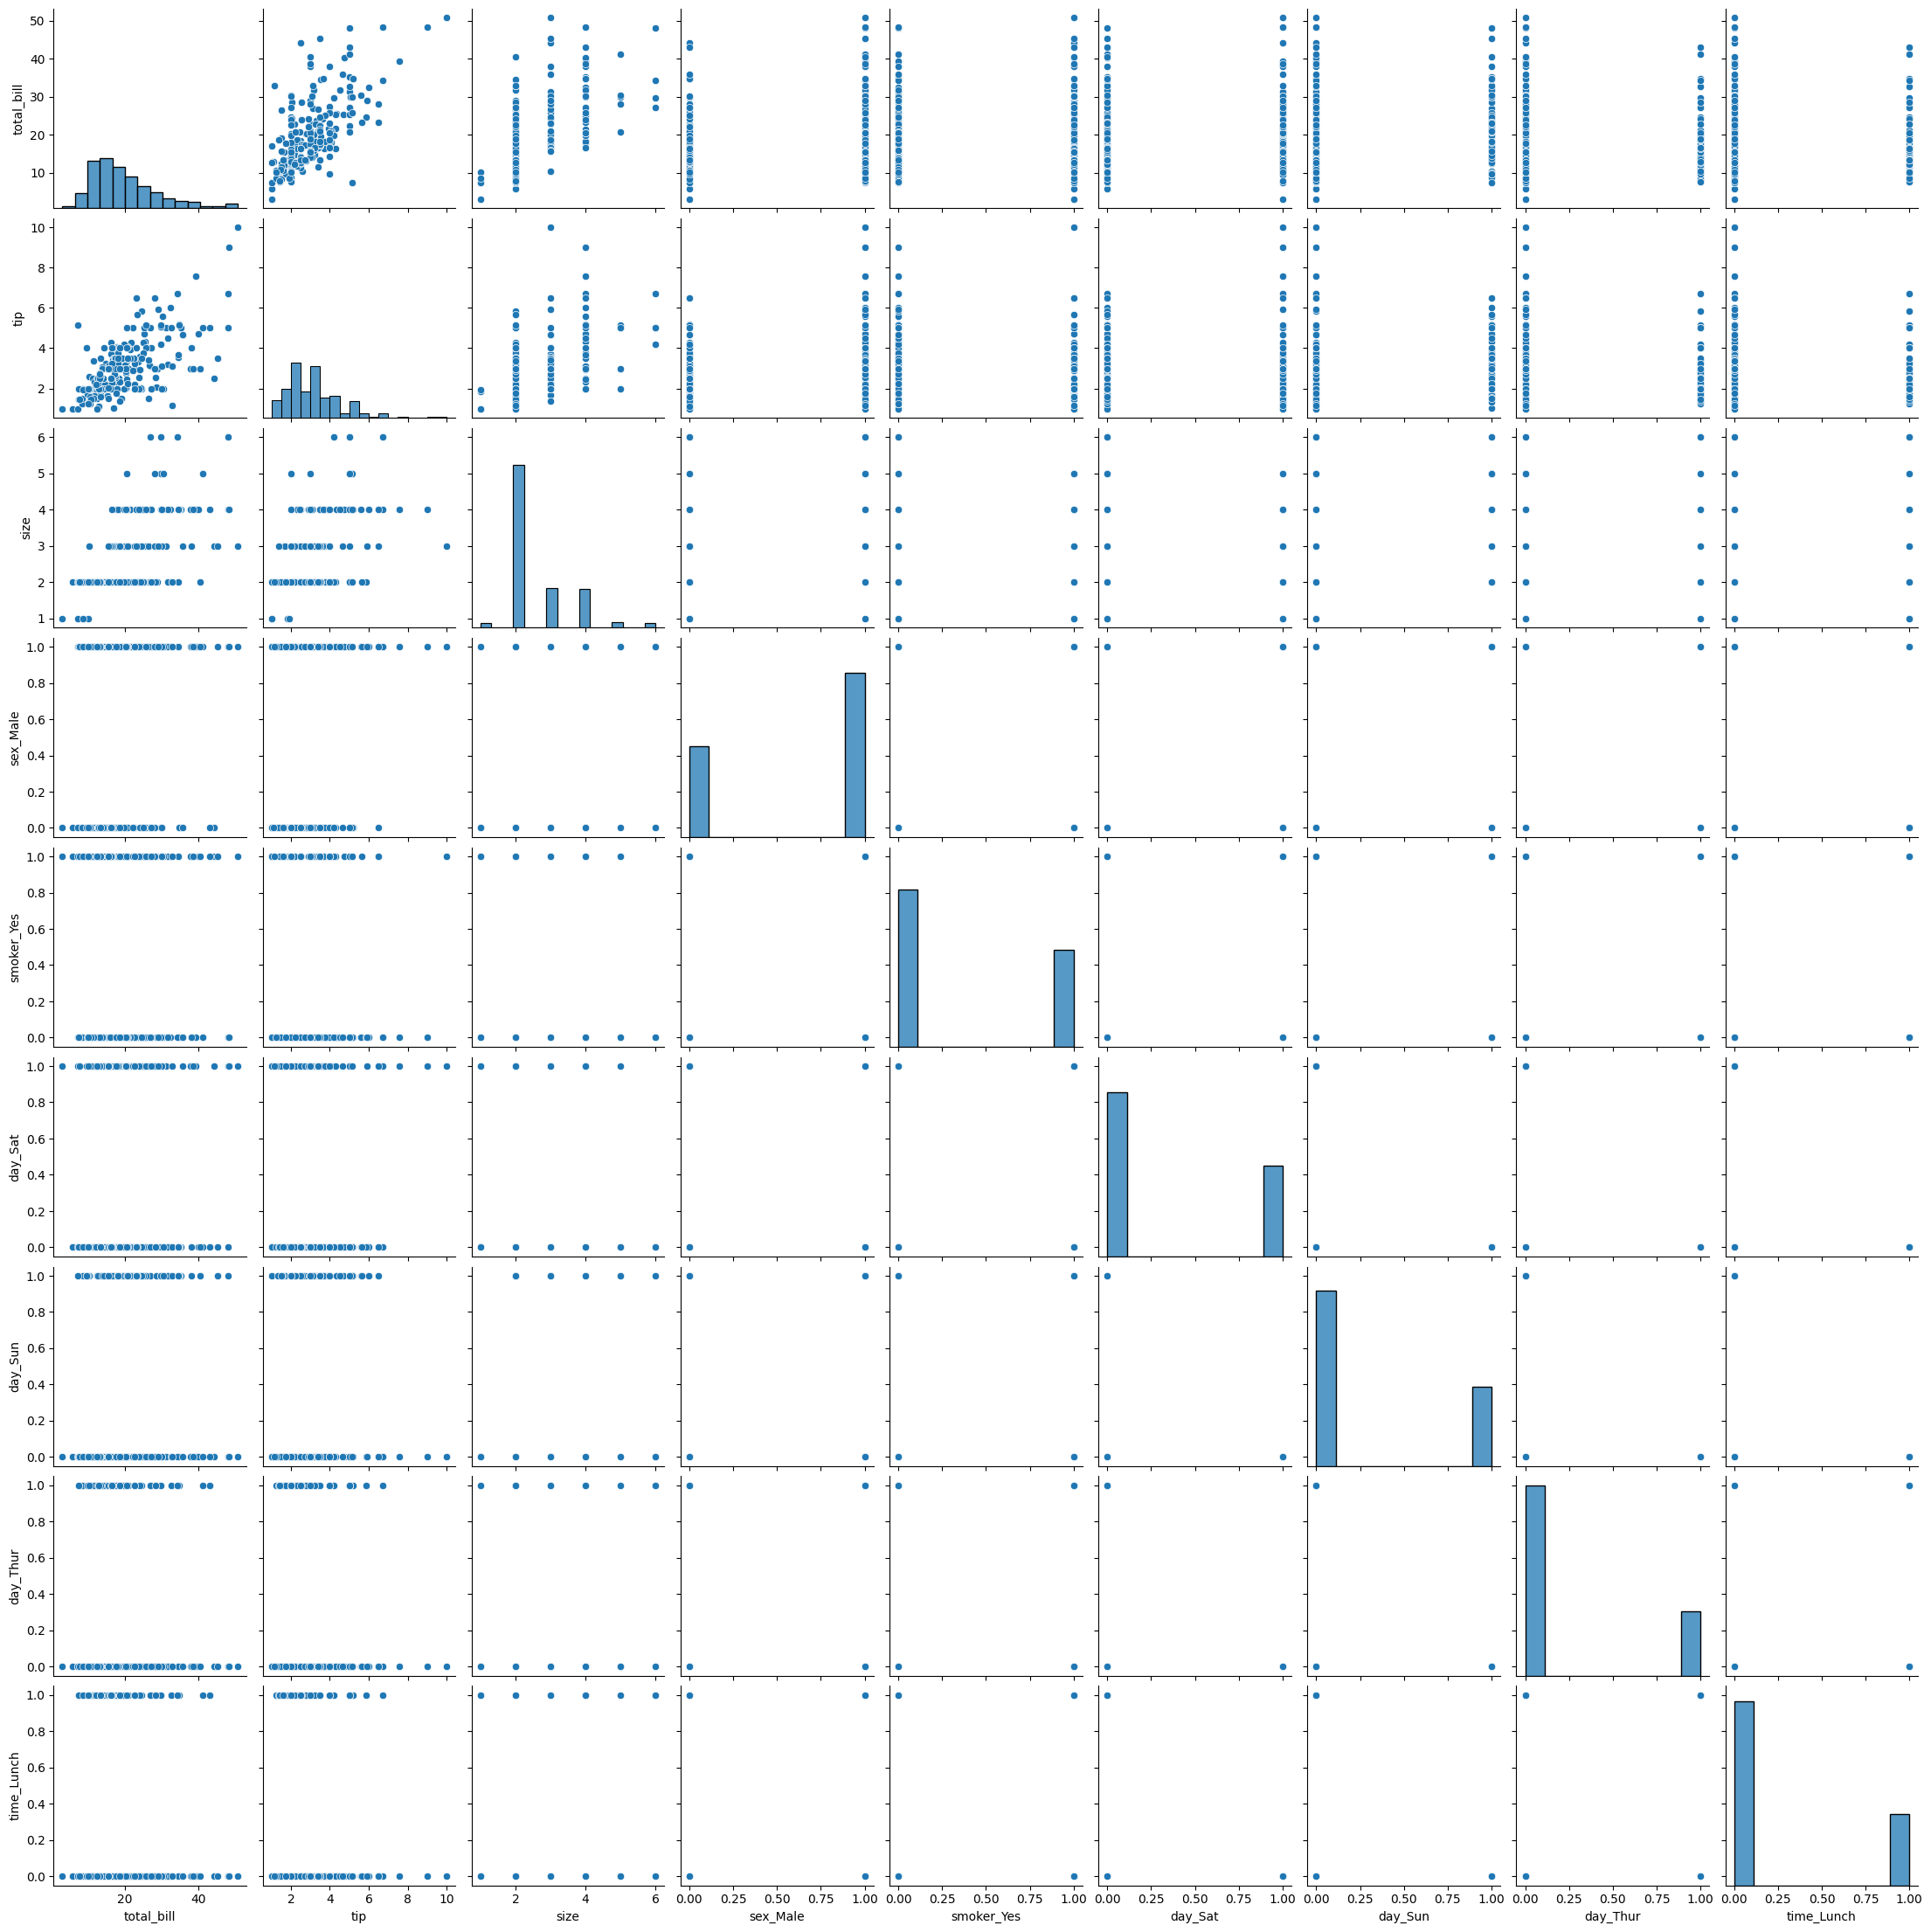

In [26]:
sns.pairplot(df)
plt.show()

### **From above pair-plots, we have same conclusions for linearity as discussed for scatter-plots as pair-plots are nothing but scatter plots of every variable vs every other variable.**

## ***Correlation Matrix (Heatmap)***

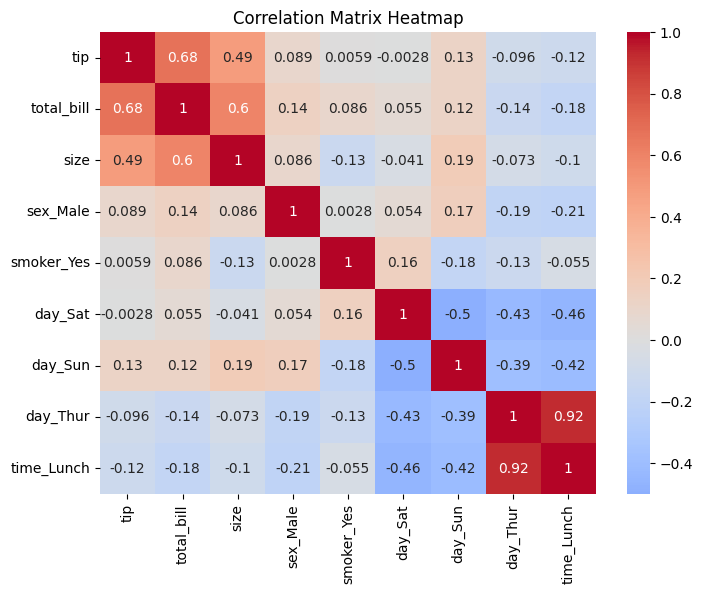

In [27]:
features = ['tip', 'total_bill', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']
df_selected = df[features]

corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


### **As seen from above heatmap, as the color for features 'total_bill' and 'size' when mapped with 'tip' is red, indicating their more significance/importance in predicting the target variable tip-amounts (which we indeed concluded using various regression models). And as the color of features changes from red to blue (for features when mapped with 'tip), their importance/significance decreases in predicting tip-amounts.**

### **Statistical Tests for Linearity (Rainbow Test)**

In [28]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

X = df.drop(columns=['tip']).astype(float)
y = df['tip']

X = sm.add_constant(X)

# Fit the linear regression model
model1 = sm.OLS(y, X).fit()

# Perform the Rainbow Test for linearity
test_statistic, p_value = linear_rainbow(model1)

print(f"Rainbow Test Statistic: {test_statistic}")
print(f"Rainbow Test p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The relationship between the target and predictors is not linear.")
else:
    print("The relationship between the target and predictors is linear.")


Rainbow Test Statistic: 1.197054547994589
Rainbow Test p-value: 0.1658838305924099
The relationship between the target and predictors is linear.


### **As already printed above, using Rainbow Test for linearity (Statistical test), we can conclude that the relationship between the target and predictors(features) is linear (as the p-value is greater than 0.05).**

### **Residuals Plot**

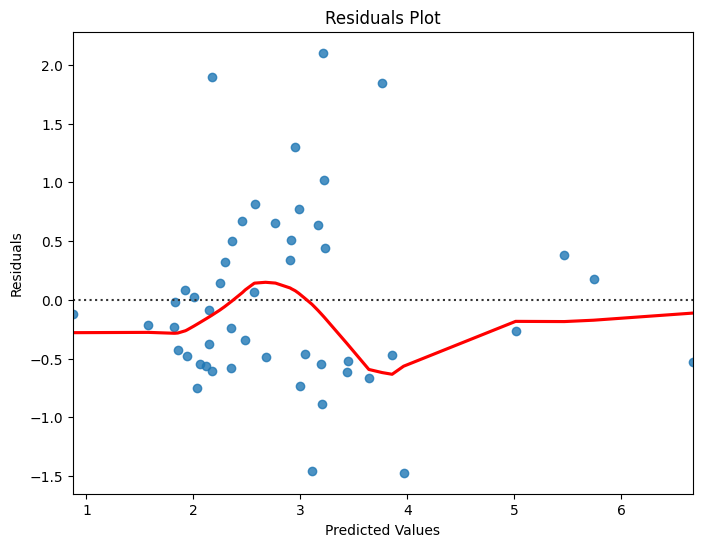

In [29]:
# Fit the linear regression model
model = linear_reg.fit(X_train, y_train)

# Get the predicted values from the model
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Create a residuals plot
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### **From above residual plot,as the residuals are randomly distributed around zero with no distinct pattern, it indicates that a linear relationship exists between the target and predictors(features).**

## **Line Plot (for time-series data)**

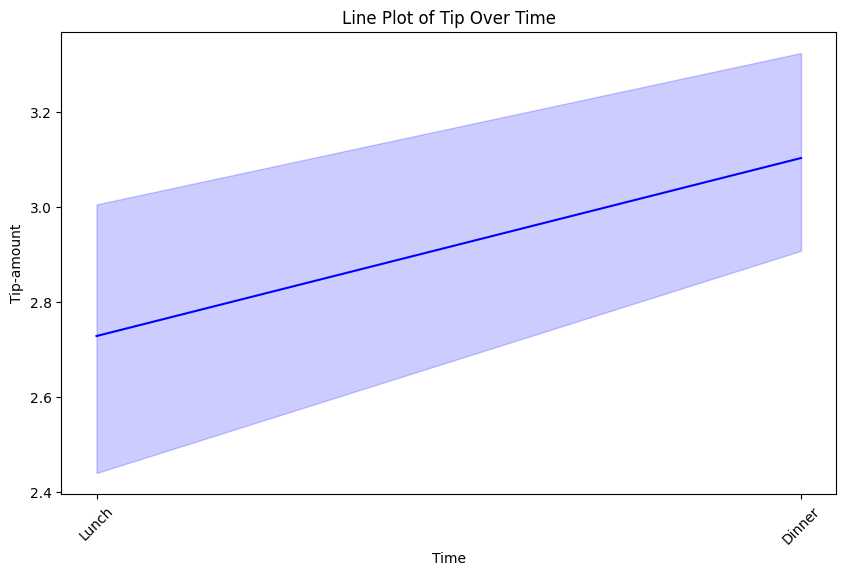

In [30]:
# 'time' is a column representing the time, and 'tip' is the target variable for the time series

df = pd.read_csv('/content/tips (data for regression problem).csv')
df['time'] = pd.Categorical(df['time'], categories=['Lunch', 'Dinner'], ordered=True)

# Create a line plot
plt.figure(figsize=(10,6))
sns.lineplot(x='time', y='tip', data=df, hue_order=['Lunch', 'Dinner'], color='blue')
plt.title('Line Plot of Tip Over Time')
plt.xlabel('Time')
plt.ylabel('Tip-amount')
plt.xticks(rotation=45)
plt.show()

### **From above line-plot (tip-amount vs time), as the line shows a consistent upward (with no abrupt fluctuations) as time moves from Lunch to Dinner direction, it indicates a linear trend. Hence, we can conclude that the data follows a linear pattern over time. Finally, we can conclude that as the trend of plot is upwards with the respect to time, tip-amount is greater for dinner than lunch.**

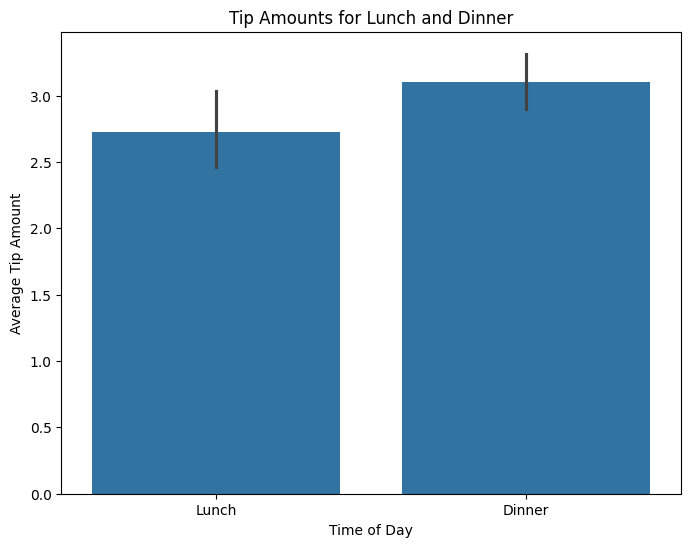

In [31]:
plt.figure(figsize=(8,6))

# Using a bar plot to visualize the mean tip amount for lunch and dinner
sns.barplot(x='time', y='tip', data=df)

# Add titles and labels
plt.title('Tip Amounts for Lunch and Dinner')
plt.xlabel('Time of Day')
plt.ylabel('Average Tip Amount')

# Show plot
plt.show()

### **As seen from above bar-plot (Tip-amount vs time of day), the average tip-amount offered is greater during Dinner than Lunch.**

# ***Apply suitable regression models and evaluate model accuracy :***

### **Based on the observed trends in the data, identified through various plots and statistical tests, we will apply the most suitable regression methods and evaluate model prediction accuracy. As determined in the initial part of this assignment, and corroborated by the data trends, Linear Regression, Ridge, Lasso, and SVR are likely to perform better for this problem than Decision Trees, Random Forests, and KNN. We will proceed with these selected models, assessing their prediction accuracy using metrics such as the R² score and various error measures (e.g., MSE, RMSE, MAE).**

In [32]:
df = pd.read_csv('/content/tips (data for regression problem).csv')

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

X = df.drop(columns='tip',axis=1)  # Feature columns
y = df['tip']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# models dictionary was defined in the initial part of this assignment, which contains models and their parameters (Linear, Ridge, Lasso, Decision Trees, Random Forests, SVR and KNN).
# as we need to apply only Linear, Ridge, Lasso and SVR,  we will delete other three (Decision Trees, Random Forests and KNN) from models dictionary.
del models['Decision Tree']
del models['Random Forest']
del models['KNN']

# Initialize dictionaries to store results
best_models = {}
evaluation = {}
y_pred = {}

In [33]:
# Loop through models and perform GridSearchCV for hyperparameter tuning
for model_name, model_info in models.items():
    model = model_info['model']
    params = model_info['params']

    # GridSearchCV to find best parameters
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_

    # Predict using the best model
    y_pred[model_name] = best_models[model_name].predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred[model_name])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred[model_name])
    r2 = r2_score(y_test, y_pred[model_name])

    # Store evaluation metrics
    evaluation[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

In [34]:
# Output of the evaluation results
evaluation_df = pd.DataFrame(evaluation).T
print(evaluation_df)

             MSE      RMSE       MAE        R2
Linear  0.703357  0.838664  0.667133  0.437302
Ridge   0.623530  0.789639  0.644002  0.501165
Lasso   0.566598  0.752727  0.625610  0.546712
SVR     0.676285  0.822366  0.661239  0.458959
